# Machine Learning - weer

### van: Mart Veldkamp

# Inhoudsopgave

1. Inleiding
2. Het probleem
3. Library's laden + data ophalen
4. Data visualiseren
    - Histrogram
    - Scatterplot
    - Normaalverdeling
5. Data voorbereiden & opschonen
    - Null waardes weghalen
    - Verrander RainToday / RainTomorrow naar 0 of 1
    - Data opsplitsen
6. Modellen selecteren
    - Decision tree
    - Random forest
7. Modellen trainen en testen
    - Modellen trainen
    - Modellen testen
    - de accuracy, precision, recall en f1
    - Confusion matrix
8. Conclusie
    - Correlatie matrix
- Bronnen

# 1. Inleiding
Deze opdracht is onderdeel van het overkoepelende vak Machine Learning, dit is één van de meerdere datasets die ik gebruik in dit vak, per dataset zijn ten minste 2 verschillende classifiers gebruikt. Deze 6 opdrachten bestaan uit classificatie- en regressieproblemen. En zijn allemaal op een andere manier opgelost.

Alle code in deze opdrachten zijn van mijzelf, gebasseerd op code uit de lessen, of waar ik zelf vast liep gebaseerd op code snippets van het internet. Mocht het toch voorkomen dat er code 1 op 1 is overgenomen, dan staat dit vermeld in de bronnen

# 2. Het probleem

Het probleem dat ik in deze notebook ga behandelen is het bepalen of een patiënt wel of niet diabetes heeft. Dit wordt gedaan aan de hand van een paar features, onder andere het glucose gehalte in het bloed. Om te bepalen of iemand wel of geen diabetes heeft zal er gekeken worden naar de dataset om zo een conclusie te halen uit voorgaande data. Dit probleem is een classificatie probleem omdat er maar 2 mogelijke uitkomsten zijn; wel of geen diabetes. Dus een binaire classificatie.

# 3. Library's laden + data ophalen

Deze dataset is afkomstig van kaggle

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
import statsmodels.api as sm
import math 
import sklearn

from pandas.plotting import scatter_matrix
from scipy import stats
from scipy.stats import kurtosis, skew
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, f1_score, roc_curve, roc_auc_score
from random import sample
%matplotlib inline 

In [12]:
data = pd.read_csv('weatherAUS.csv')

print(f'De dataset heeft {data.shape[0]} rijen, en {data.shape[1]} kolommen')
print('\nDit zijn de features/target')
print(data.dtypes)

print('\nHier een kleine sample van de dataset')
data.head()

De dataset heeft 145460 rijen, en 23 kolommen

Dit zijn de features/target
Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

Hier een kleine sample van de dataset


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


De kolommen worden als volgt geïnterpreteerd:
- Date: de datum
- Location: De locatie
- MinTemp: De minimum temph in graden celsius
- MaxTemp: De maximale temph in graden celsius
- Rainfall: De hoeveelheid regen wat er was gevallen in mm
- Evaporation: De hoeveelheid verdamping wat plaatsvid in mm
- Sunshine: De hoeveelheid uren per dag dat er zon was
- WindGustDir: De directie van de strengste windrichting in 24 uur
- WindGustSpeed: De windshelheid in km/h
- WindDir9am: De kant de wind op staat om 9am
...
- RainToday: Heeft het vandaag geregent ja/nee
- RainTomorrow: Heeft het de dag daarna geregent ja/nee

### Checken of er waardes missen

In [13]:
data['RainTomorrow'].isnull().sum()

3267

Er missen waardes, deze moet ik later opschonen

### Visualiseer de frequentie van RainTomorrow

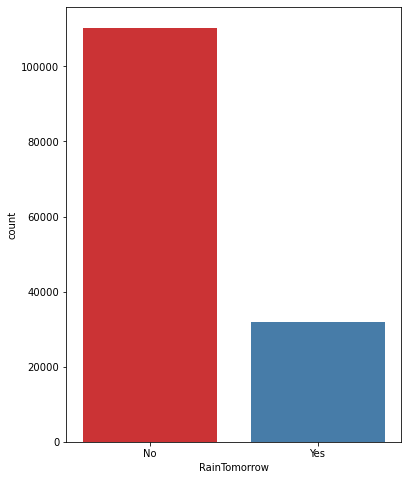

In [14]:
f, ax = plt.subplots(figsize=(6, 8))
ax = sns.countplot(x="RainTomorrow", data=data, palette="Set1")
plt.show()

Zoals je kan zien valt er veel vaker geen water dan wel in Australië.

# 4. Data visualiseren

### Histrogram

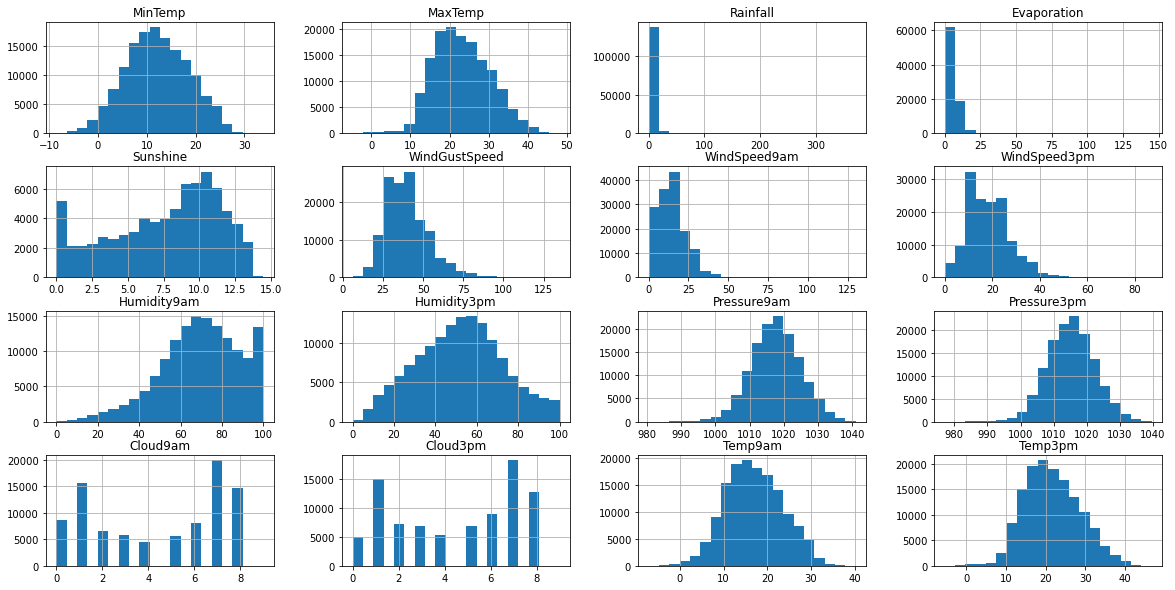

In [15]:
 data.hist(bins = 20, figsize = (20,10));

Het belangrijkste wat je hier kan zien is dat we in onze dataset vooral te maken hebben met normaal verdelingen. Bijna bij elk kopje gerelateerd met temph/druk is er een normaal verdeling. Dit is ook logisch aangezien het weer nooit of heel warm of heel koud is. Daarnaast Zie je bij WindSpeed eigenlijk dat het 80% van de gevallen een erg lage windshelheid heeft, met een kleine afweiking naar hogeren snelheden.

### Scatterplot

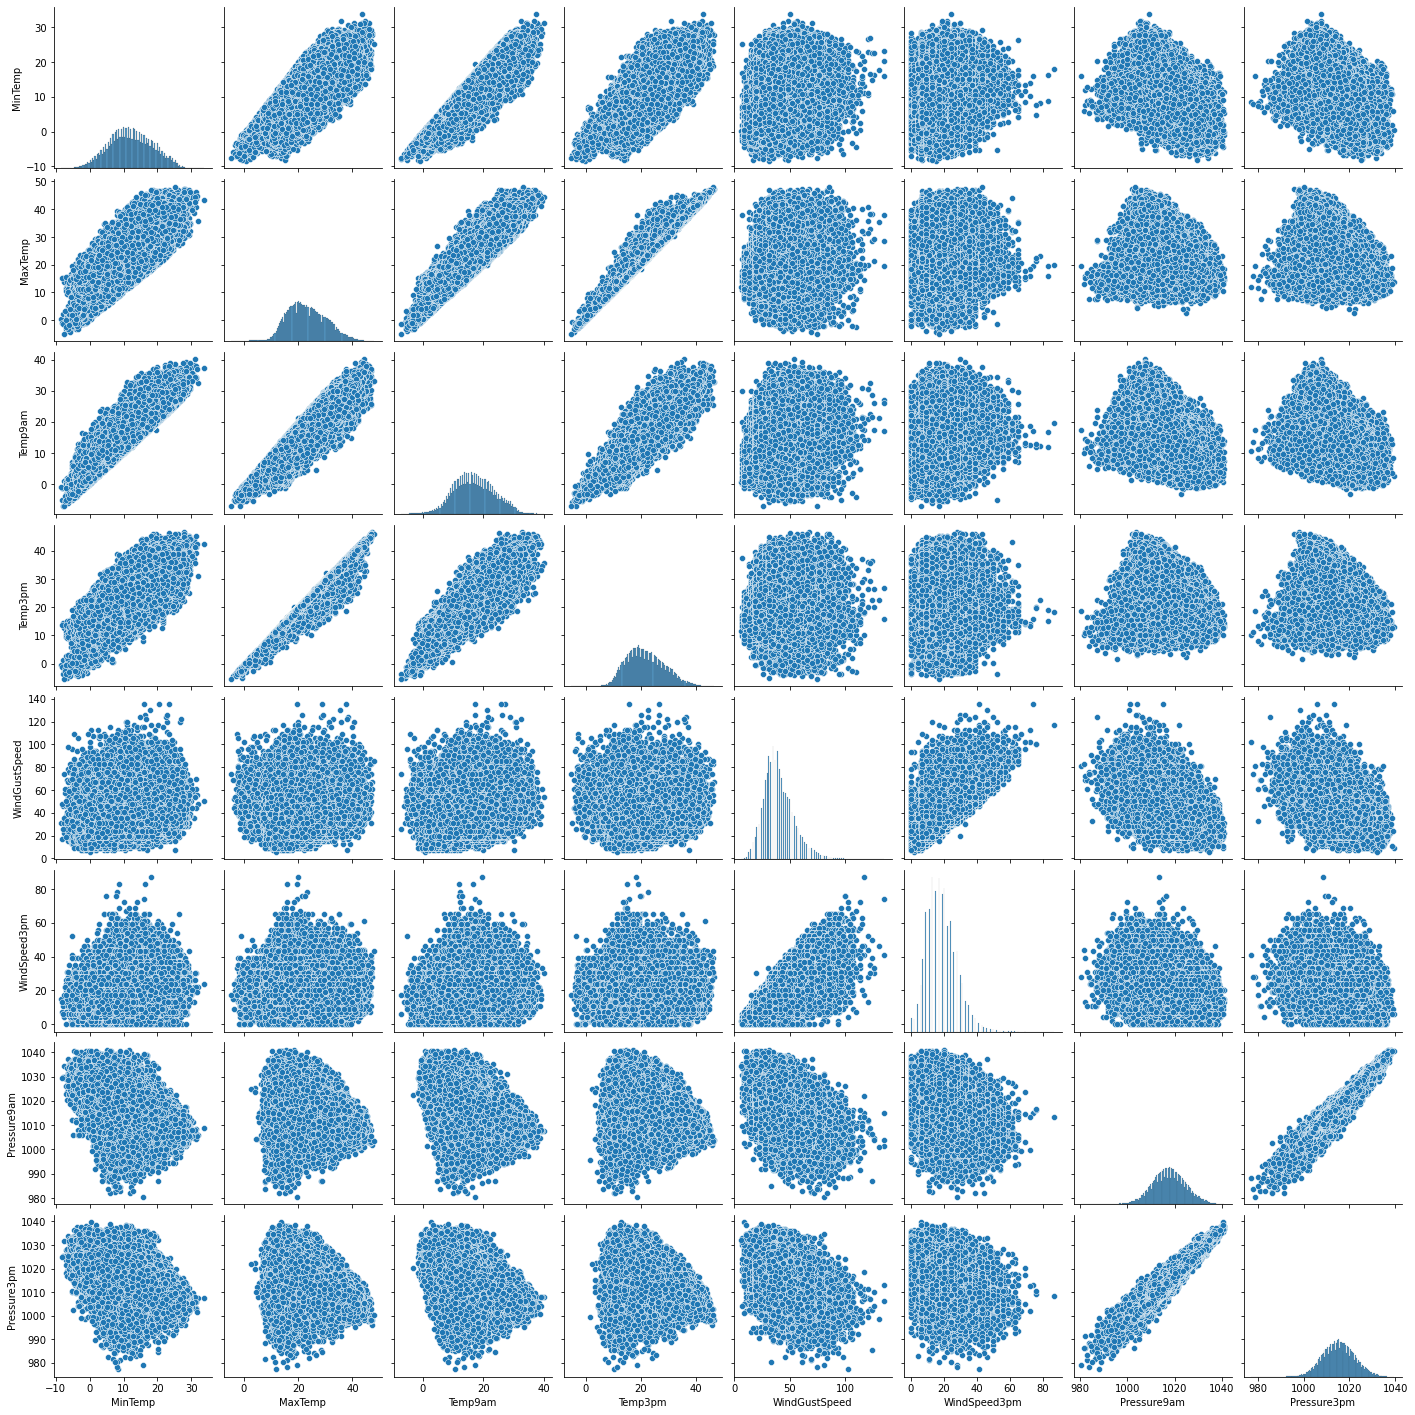

In [16]:
num_var = ['MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm', 'WindGustSpeed', 'WindSpeed3pm', 'Pressure9am', 'Pressure3pm']

sns.pairplot(data[num_var], kind='scatter', diag_kind='hist', palette='Rainbow')
plt.show()

Ik heb een scatter matrix gemaakt om te kijken of er enige correlatie zit tussen de data, hierbij heb ik een paar columns gepakt en die in een scatter matrix gedaan. Zoals je kunt zien is er bij bijna geen 1 data een sterke correlatie. Behalve bij de data waarvan je dat verwacht, zoals de druk om 3am ten opzichte van 9 am.

# 5. Data voorbereiden & opschonen

## Null waardes weghalen

Om te controleren of elke kolom gevuld is kan het onderstaande gebruikt worden.

In [17]:
data = data.dropna()
data.drop('Date', axis=1, inplace = True)
data.drop('Location', axis=1, inplace = True)
data.drop('WindGustDir', axis=1, inplace = True)
data.drop('WindDir9am', axis=1, inplace = True)
data.drop('WindDir3pm', axis=1, inplace = True)


## Verrander RainToday / RainTomorrow naar 0 of 1

In [18]:
data['RainToday'] = data['RainToday'].map({'Yes': 1, 'No': 0})
data['RainTomorrow'] = data['RainTomorrow'].map({'Yes': 1, 'No': 0})

data['RainTomorrow']

6049      0
6050      0
6052      0
6053      0
6054      0
         ..
142298    0
142299    0
142300    0
142301    0
142302    0
Name: RainTomorrow, Length: 56420, dtype: int64

## Data opsplitsen

In [19]:
x_data = data.drop('RainTomorrow', axis=1)
y_data = data['RainTomorrow']

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2, random_state = 42)

# 6. Modellen selecteren & instellen

Voor deze opdracht zullen de 2 modellen gebruikt worden:
- Decision Tree
- Random Forest

Ik ga ervan uit dat Random Forest beter is dan Decision tree, dit komt omdat random forest gebruik maakt van meerdere tree's, vandaar de naam forest. Ik weet alleen niet hoe goed de modellen zullen presteren met deze dataset. Dus daar zal ik later een conclusie uit trekken.

# 7. Modellen trainen en testen

## Decision tree (classification)

### Train en test het model

In [20]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)

dt_pred = dt_model.predict(x_test)

### De accuracy, precision, recall en f1

In [21]:
print('accuracy: ',metrics.accuracy_score(y_test, dt_pred))
print('Precision: ',metrics.precision_score(y_test, dt_pred, average='micro'))
print('Recall: ',metrics.recall_score(y_test, dt_pred, average='micro'))
print('f1: ',metrics.f1_score(y_test, dt_pred, average='micro'))

accuracy:  0.8008684863523573
Precision:  0.8008684863523573
Recall:  0.8008684863523573
f1:  0.8008684863523573


### Confusion matrix

In [23]:
matrix = metrics.confusion_matrix(y_test, dt_pred)
print(matrix)

print('\nDit wil zeggen dat van de 1300, Logistic regression er 1277 goed heeft')
print('Dit is', 9037/11284*100, '%')

[[7670 1129]
 [1118 1367]]

Dit wil zeggen dat van de 1300, Logistic regression er 1277 goed heeft
Dit is 80.08684863523573 %


## Random forest

In [24]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)

rf_pred = rf_model.predict(x_test)

In [25]:
print('accuracy: ',metrics.accuracy_score(y_test, rf_pred))
print('Precision: ',metrics.precision_score(y_test, rf_pred, average='micro'))
print('Recall: ',metrics.recall_score(y_test, rf_pred, average='micro'))
print('f1: ',metrics.f1_score(y_test, rf_pred, average='micro'))

accuracy:  0.8619283941864587
Precision:  0.8619283941864587
Recall:  0.8619283941864587
f1:  0.8619283941864587


In [26]:
matrix = metrics.confusion_matrix(y_test, rf_pred)
print(matrix)

print('\nDit wil zeggen dat van de 1300, Logistic regression er 1277 goed heeft')
print('Dit is', 9037/11284*100, '%')

[[8418  381]
 [1177 1308]]

Dit wil zeggen dat van de 1300, Logistic regression er 1277 goed heeft
Dit is 80.08684863523573 %


# 8. Conclusie

## Correlatie matrix

<AxesSubplot:>

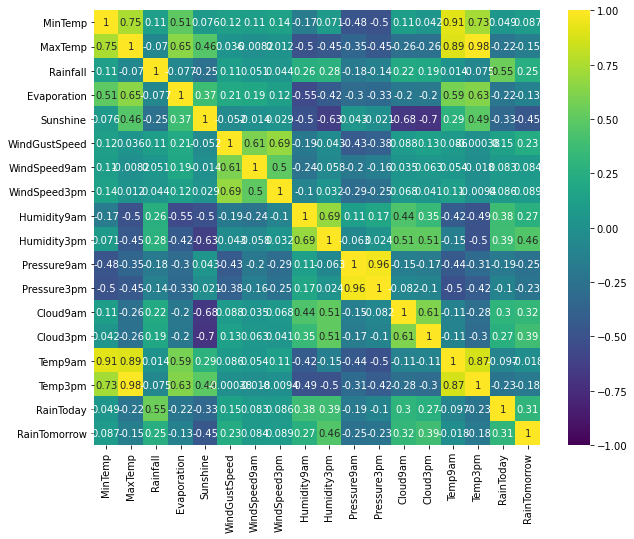

In [27]:
plt.figure(figsize = (10, 8))
sns.heatmap(data.corr(method='pearson'), annot=True, cmap='viridis', vmin=-1, vmax=1)

Zo een correlatiematrix is erg fijn om conlusies uit te kunenn trekken, zodat je weet dat je data wel echt klopt. Een goed voorbeeld is natuurlijk de meetingen op 9am t.o.v metingen op 3pm verschillen niet veel. Wat logisch is, omdat de temph bijna nooit drastisch verranderd in zo een korte tijd. Daarnaast zie je ook een mooie correlatie tussen wolken en zonneschijn, hoe meer wolken, hoe lager de kans op zon.

## Conclusie Decision tree vs Random forest

Mijn conclusie is dat random forest beter is dan decision tree, maar niet zo erg veel. Dit voldeed aan mijn verwachtingen aangezien ik zelf ook dacht dat random forest accurater zou zijn dan een decision tree.